$$\textbf{Exponential population growth }$$

$$\frac{dN}{dt} = kN$$

$$\text{Scale units} =  \sqrt{u^2 +v^2}$$
$$dN = k N dt $$
$$\text{Change in time can be any number}$$
$$\text{Angles is just if} x* y = \text{positive} \text{ point upward} $$

$$\text{With actual solutions}$$
$$\text{For:... t it's better to take decimal so that the curve is drawn well not like a normal line}$$
$$ N(t) = N_O e^{kt}$$

0
10


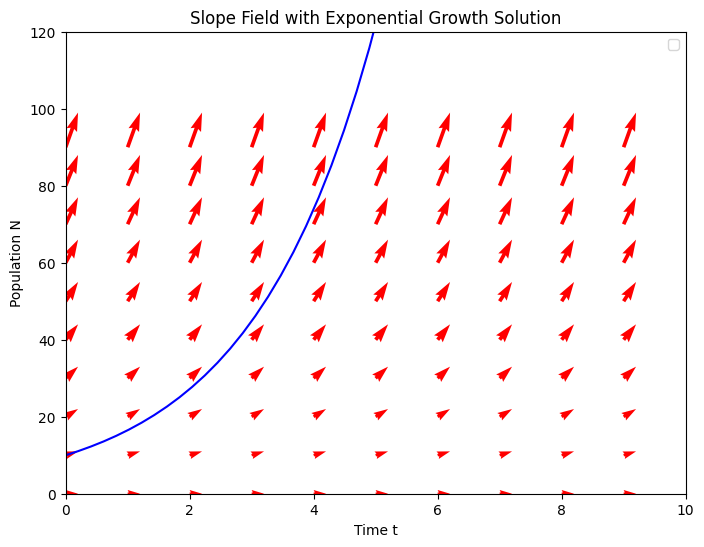

In [96]:
import numpy as np 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

k= 0.5
N_O= 10

t=np.arange(0,10)
N = np.arange(0, 100, 10)

T, N_grid = np.meshgrid(t,N)
print(T[1,0])
print(N_grid[1,0])

dN = k * N_grid
dt = np.ones_like(dN)

plt.figure(figsize=(8,6))

plt.quiver(T, N_grid, dt, dN, angles='xy', scale_units='xy', scale=5, color='red')


t=np.linspace(0,10)
N_t = N_O* np.exp(k*t)
plt.plot(t,N_t,color='Blue')
plt.xlim(0,10)
plt.ylim(0,120)

plt.xlabel("Time t")
plt.ylabel("Population N")
plt.title("Slope Field with Exponential Growth Solution")
plt.legend()
plt.show()





$$\textbf{Example to understand quiver}$$

$$\frac{dP}{dt} = 0.8P$$

![values of p and t](t_p_values.png)

(-3.5, 3.5)

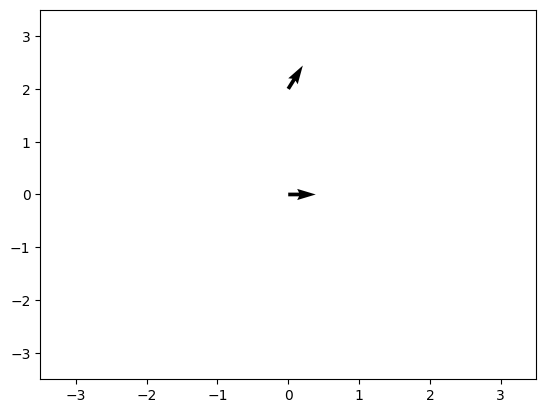

In [81]:

plt.quiver(0,0,1,0)
plt.quiver(0,2,1,1.6) 
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)

$$\textbf{Logistic population growth}$$

$$\text{t\_span: steps from t =  0.0\,0.12\,0.31\, …\,15.0 }$$
$$\text{t\_eval: where the solution is at that t}$$

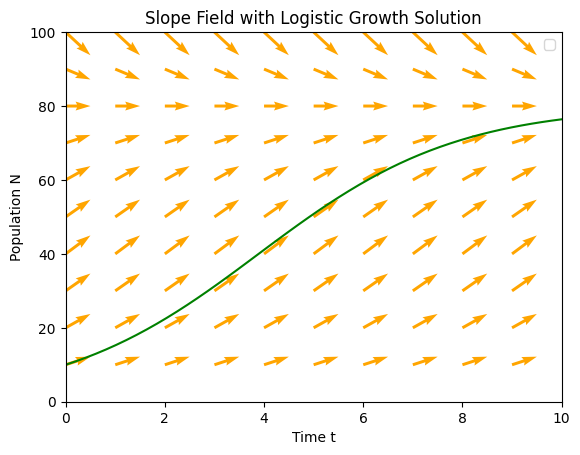

In [136]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def dN_dt(t,N,r,k):
    return r* N*(1 - (N/k))

r=0.5
k=80
N_0 = 10 

t_span=(0,15)
t_eval= np.linspace(0,10)
solution = solve_ivp(dN_dt,t_span, y0= [N_0],t_eval=t_eval, args=(r,k))
plt.plot(t_eval,solution.y[0],color='green')







t= np.arange(0,10)
N= np.arange(10,110,10)

t, N_grid = np.meshgrid(t,N)
dN = r* N_grid*(1 - (N_grid/k))

dt = np.ones_like(dN)

plt.quiver(t,N_grid,dt,dN, angles="xy", scale_units="xy", scale = 2,color ="orange")




plt.xlim(0,10)
plt.ylim(0,100)

plt.xlabel("Time t")
plt.ylabel("Population N")
plt.title("Slope Field with Logistic Growth Solution")
plt.legend()


plt.show()

